In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df=pd.read_pickle('Pickle_f2.pickle')

In [3]:
df.columns

Index(['date_string', 'session_id', 'event', 'event_data', 'URL', 'referrer',
       'servertimestamp', 'pagetitle', 'browser', 'mobile_device',
       'user_agent', 'utm_source', 'utm_medium', 'utm_term', 'utm_content',
       'utm_campaign', 'fingerprint', 'timestamp_x', 'netloc', 'path',
       'refnetloc', 'refpath', 'localtime', 'Application', 'Funded'],
      dtype='object')

In [4]:
completion_data= df[df.Application].copy()

In [5]:
print(completion_data.columns)

Index(['date_string', 'session_id', 'event', 'event_data', 'URL', 'referrer',
       'servertimestamp', 'pagetitle', 'browser', 'mobile_device',
       'user_agent', 'utm_source', 'utm_medium', 'utm_term', 'utm_content',
       'utm_campaign', 'fingerprint', 'timestamp_x', 'netloc', 'path',
       'refnetloc', 'refpath', 'localtime', 'Application', 'Funded'],
      dtype='object')


In [6]:
one_hot=pd.get_dummies(completion_data['refnetloc'])

In [7]:
completion_data=completion_data.join(one_hot)

In [8]:
completion_data=completion_data.drop('refnetloc',axis=1)

In [9]:
features=one_hot.columns

In [10]:
y=completion_data.Funded

In [11]:
x=completion_data[features]

In [12]:
train_x, val_x, train_y, val_y= train_test_split(x,y, random_state=1)

In [13]:
alpharank_model=DecisionTreeRegressor(random_state=1)

In [14]:
alpharank_model.fit(train_x,train_y)

DecisionTreeRegressor(random_state=1)

In [15]:
val_y_pred = alpharank_model.predict(val_x)

In [16]:
score = alpharank_model.score(train_x,train_y)
print("R-squared:", score) 

R-squared: 0.15595361028564958


In [17]:
y_predicted = np.where(val_y_pred>0.5,1,0)

In [18]:
print("Confusion Matrix")
matrix = confusion_matrix(val_y, y_predicted)
print(matrix)

print("Class Report")
report = classification_report(val_y, y_predicted)
print(report)

accuracy = accuracy_score(val_y, y_predicted)
print('Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[378   0]
 [ 38   0]]
Class Report
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       378
        True       0.00      0.00      0.00        38

    accuracy                           0.91       416
   macro avg       0.45      0.50      0.48       416
weighted avg       0.83      0.91      0.87       416

Classification Accuracy of the model: 90.87%


C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


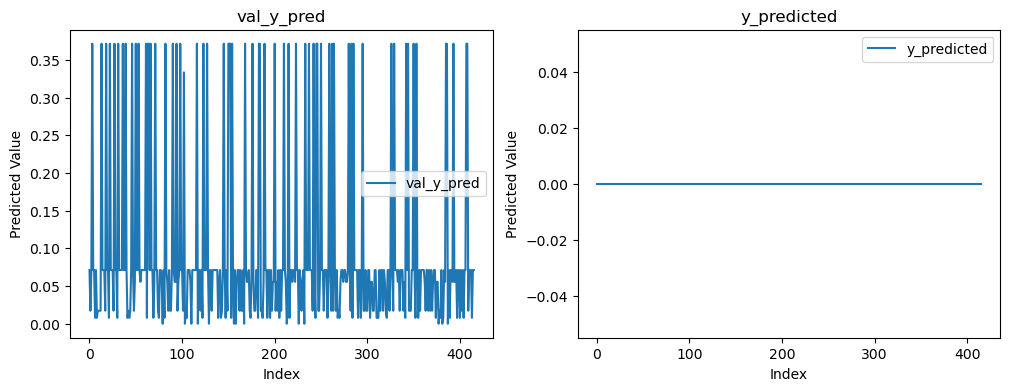

In [19]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the predicted values in the first subplot
ax1.plot(val_y_pred, label='val_y_pred')
ax1.set_title('val_y_pred')
ax1.set_xlabel('Index')
ax1.set_ylabel('Predicted Value')
ax1.legend()

# Plot the thresholded predicted values in the second subplot
ax2.plot(y_predicted, label='y_predicted')
ax2.set_title('y_predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Predicted Value')
ax2.legend()

# Show the plot

In [20]:
display(val_y_pred,val_y)

array([0.07117438, 0.01724138, 0.07117438, 0.37142857, 0.07117438,
       0.07117438, 0.0078125 , 0.07117438, 0.0078125 , 0.01724138,
       0.01724138, 0.01724138, 0.01724138, 0.37142857, 0.07117438,
       0.07117438, 0.07117438, 0.01724138, 0.37142857, 0.07117438,
       0.07117438, 0.0078125 , 0.37142857, 0.07117438, 0.07117438,
       0.07117438, 0.01724138, 0.37142857, 0.07117438, 0.07117438,
       0.0078125 , 0.37142857, 0.07117438, 0.07117438, 0.07117438,
       0.07117438, 0.37142857, 0.07117438, 0.07117438, 0.37142857,
       0.07117438, 0.0078125 , 0.01724138, 0.0078125 , 0.01724138,
       0.07117438, 0.37142857, 0.07117438, 0.01724138, 0.05555556,
       0.37142857, 0.07117438, 0.07117438, 0.37142857, 0.07117438,
       0.05555556, 0.07117438, 0.07117438, 0.07117438, 0.07117438,
       0.07117438, 0.37142857, 0.0078125 , 0.37142857, 0.37142857,
       0.07117438, 0.37142857, 0.07117438, 0.07117438, 0.0078125 ,
       0.05555556, 0.37142857, 0.07117438, 0.07117438, 0.01724

314049    False
243729    False
164692    False
206203     True
394050    False
          ...  
130784    False
37136     False
213875    False
280587    False
22356     False
Name: Funded, Length: 416, dtype: bool